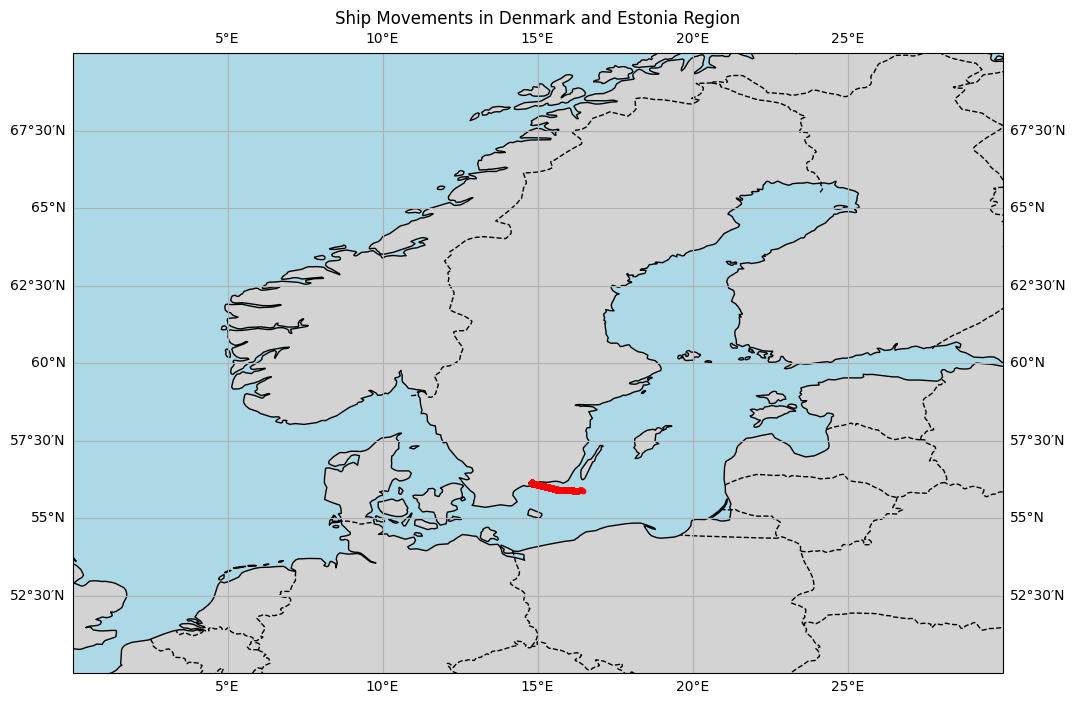

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pymongo

# MongoDB connection setup
client = pymongo.MongoClient("mongodb://localhost:27020")
db = client.ais_db
collection = db.vesseldata

# Example function to fetch data based on MMSI
def get_ship_data(mmsi):
    return pd.DataFrame(list(collection.find({"mmsi": mmsi}, {"latitude": 1, "longitude": 1, "timestamp": 1, "_id": 0})))

def plot_ship_movements(ship_data):
    plt.figure(figsize=(12, 10))  # Increase figure size for better clarity
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Add features to improve map appearance
    ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='lightgrey')
    ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor='lightblue')
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linestyle='--')

    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

    # Set extent for Denmark and Estonia region
    ax.set_extent([0, 30, 50, 70], crs=ccrs.PlateCarree())

    # Scatter plot for ship data
    ax.scatter(ship_data["longitude"], ship_data["latitude"], color='red', marker='o', s=10, zorder=5)


    plt.title('Ship Movements in Denmark and Estonia Region')
    plt.show()

# Test with your MMSI
mmsi = 277466000
ship_data = get_ship_data(mmsi)

if not ship_data.empty:
    plot_ship_movements(ship_data)
else:
    print(f"No records found for MMSI: {mmsi}")